# **Final Project of Machine Learning 2021/2022**

## Presentation

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

This dataset contains data from patients hospitalized for presumed cardiovascular diseases. Inside, we can find both healthy patients and those with heart disease. Obviously, all the data relating to their state of health are present, as we will see later. We have chosen it because in the medical world prevention is never too much and through research it is possible to prevent and treat many diseases that could otherwise be fatal.

People with cardiovascular disease or who are at high cardiovascular risk need early detection and management wherein a machine learning model can be of great help.


## Dataset explaination

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]



## Work written by

*   Christian Stingone (https://github.com/ChriStingo)
*   Alex Di Stefano (https://github.com/xDiste)



# **Import**

Import useful libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno    # cool print for NaN values into dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
import seaborn as sns

# **Read and Correct the Dataset**

## Read the CSV and display it

In [ ]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Dealing to missing and bad values

### Summary of the dataset (**before**)

State of the dataset

##### Type of columns #####
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

##### Nan Value #####
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR 

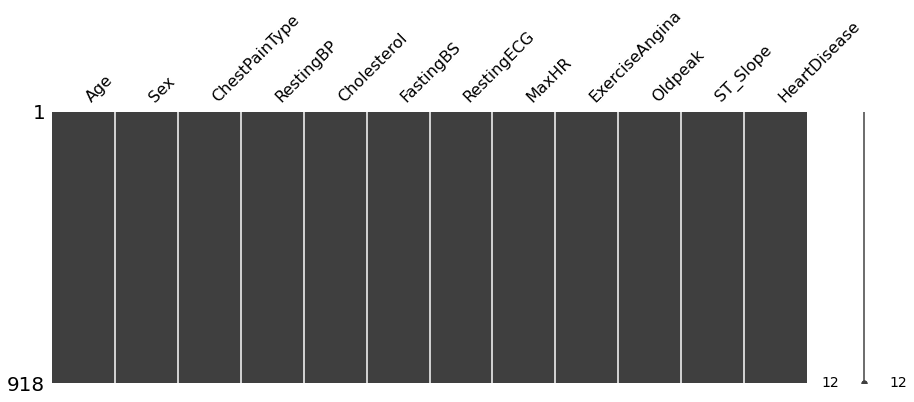

In [ ]:
print("##### Type of columns #####")
print(df.info(), end="\n\n")

print("##### Nan Value #####")
print(df.isnull().sum(), end="\n\n")

print("##### Chart of missing values #####")
missingno.matrix(df, figsize=(15, 5))

### Remove duplicates

in this dataset we have a duplicate row. In order to get more accurate predictions we remove this clone

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

### Check data values

Check if there are some errors inside our data

In [ ]:
for column in df:
    print(column, ": ", sorted(df[column].unique()), end="\n\n")

Age :  [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]

Sex :  ['F', 'M']

ChestPainType :  ['ASY', 'ATA', 'NAP', 'TA']

RestingBP :  [0, 80, 92, 94, 95, 96, 98, 100, 101, 102, 104, 105, 106, 108, 110, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 150, 152, 154, 155, 156, 158, 160, 164, 165, 170, 172, 174, 178, 180, 185, 190, 192, 200]

Cholesterol :  [0, 85, 100, 110, 113, 117, 123, 126, 129, 131, 132, 139, 141, 142, 147, 149, 152, 153, 156, 157, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 2

As we can see from this print we have wrong values, such as cholesterol and restingBP. These columns have data with a value of 0, this is not possible. To make a correction we will replace these 0s with the average value of the entire column

In [ ]:
df['RestingBP'][df['RestingBP'] == 0] = int(df['RestingBP'].mean())
df['Cholesterol'][df['Cholesterol'] == 0] = int(df['Cholesterol'].mean())

print("RestpingBP: ", sorted(df['RestingBP'].unique()), end="\n\n")
print("Cholesterol: ", sorted(df['Cholesterol'].unique()), end="\n\n")

RestpingBP:  [80, 92, 94, 95, 96, 98, 100, 101, 102, 104, 105, 106, 108, 110, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 150, 152, 154, 155, 156, 158, 160, 164, 165, 170, 172, 174, 178, 180, 185, 190, 192, 200]

Cholesterol:  [85, 100, 110, 113, 117, 123, 126, 129, 131, 132, 139, 141, 142, 147, 149, 152, 153, 156, 157, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 27

### Summary of the dataset (**after**)

State of the dataset

After:
##### Type of columns #####
<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB
None

##### Nan Value #####
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0

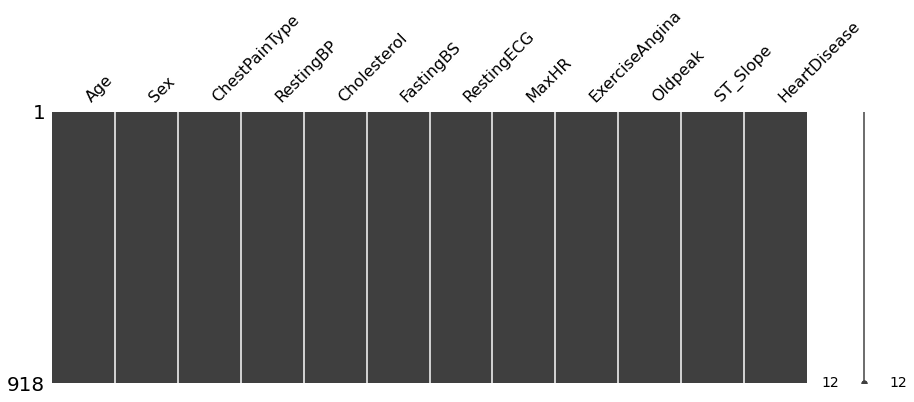

In [ ]:
print("After:")
print("##### Type of columns #####")
print(df.info(), end="\n\n")

print("##### Nan Value #####")
print(df.isnull().sum(), end="\n\n")

print("##### Chart of missing values #####")
missingno.matrix(df, figsize=(15, 5))

# **Observations on the dataset**

In this section we want to make some observations on the dataset in order to fully understand the application domain in which we are operating and to be able to better understand how to structure our ML model

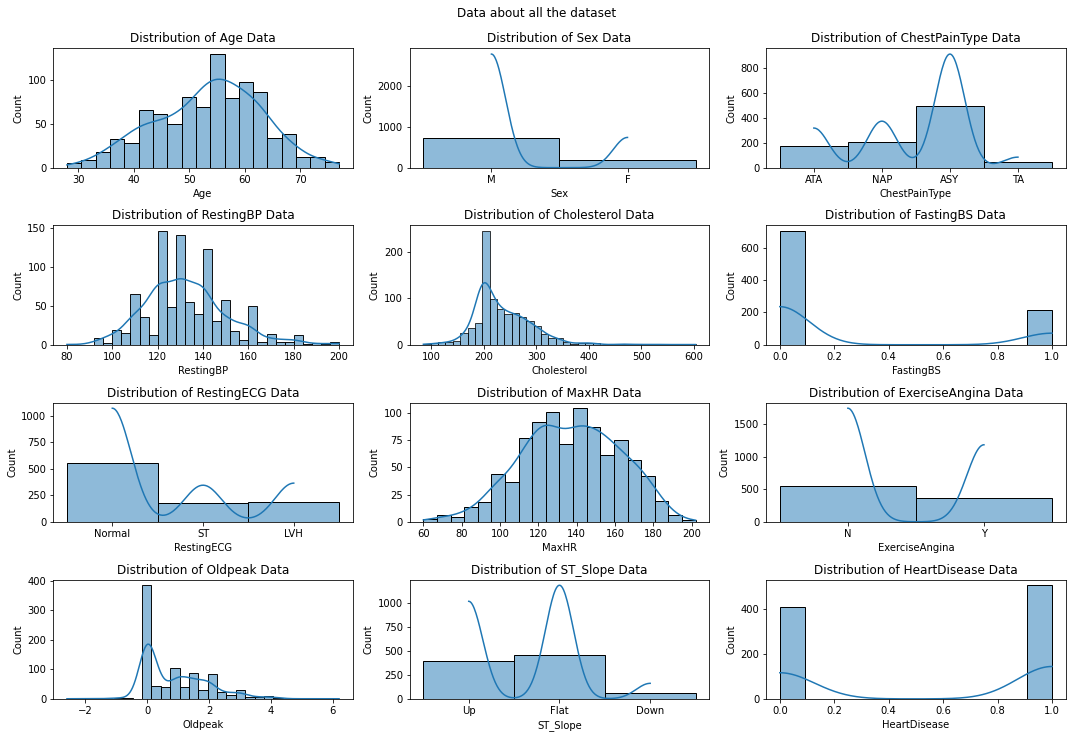

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("Data about all the dataset", y=1.02)
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

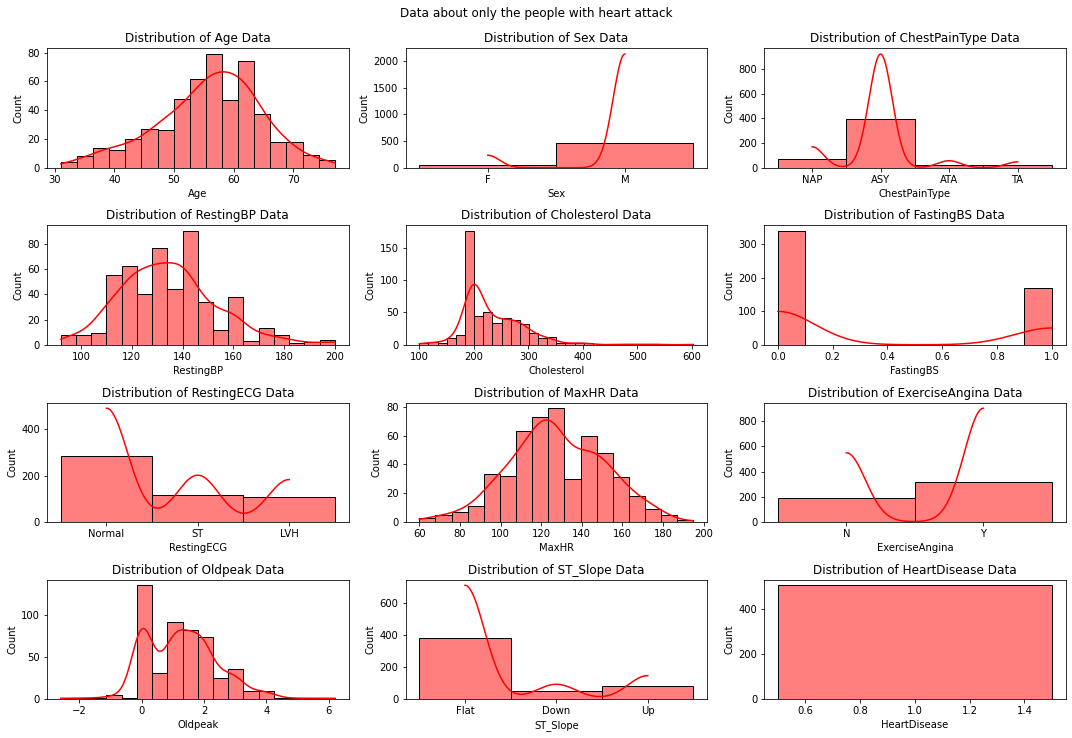

In [ ]:
df_heart_failure = df[df['HeartDisease'] == 1]
fig = plt.figure(figsize=(15,10))
fig.suptitle("Data about only the people with heart attack", y=1.02)
for i,col in enumerate(df_heart_failure.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_heart_failure[col],kde=True, color='red')
    plt.tight_layout()
    plt.plot()

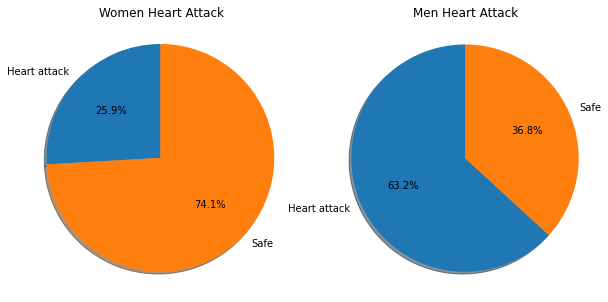

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
women = df[df['Sex'] == 'F']
men = df[df['Sex'] == 'M']
women_chart = [women[women['HeartDisease'] == 1].shape[0] / women.shape[0], women[women['HeartDisease'] == 0].shape[0] / women.shape[0]]
men_chart = [men[men['HeartDisease'] == 1].shape[0] / men.shape[0], men[men['HeartDisease'] == 0].shape[0] / men.shape[0]]

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title("Women Heart Attack")
ax1.pie(women_chart, labels=['Heart attack', 'Safe'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.set_title("Men Heart Attack")
ax2.pie(men_chart, labels=['Heart attack', 'Safe'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

[]

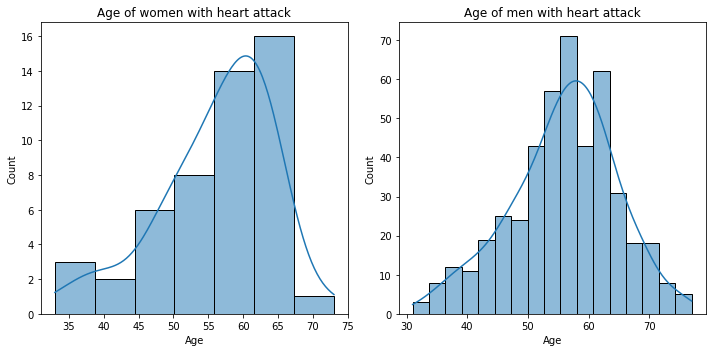

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Age of women with heart attack")
sns.histplot(women[women['HeartDisease'] == 1]['Age'],kde=True)
plt.tight_layout()
plt.plot()
plt.subplot(1,2,2)
plt.title("Age of men with heart attack")
sns.histplot(men[men['HeartDisease'] == 1]['Age'],kde=True)
plt.tight_layout()
plt.plot()

Maybe suffer from gender bias?

# **Predictions**

In this section we want to predict the probability of person to have an heart attack. To do that we choose different ML Models and we want to compare them to find the best one for our purpose. 

We will evaluate the goodness of 2 predictive models:
1.   Random Forest
2.   KNN

To compare them we will evaluate their accuracy, i.e. first of all we will train the models on the test cases prepared, then making them associate which elements must have target 0 and which 1. Subsequently we will run the algorithm on elements unknown to him and check if the predicted target will match the actual one. The ratio between correct elements and total elements will be expressed as a percentage, this will tell us the accuracy of the prediction. Subsequently we will show a matrix, this matrix is ​​composed of 2 rows and 2 columns and indicates the predicted values ​​corresponding to the real values. In this way we could evaluate both which targets were predicted correctly and which ones were wrong. This concept anticipates the ROC curve (Receiver operating characteristic) which has a well known trend. Sensitivity and specificity can be represented along the two axes, respectively represented by True Positive Rate (TPR, fraction of true positives) and False Positive Rate (FPR, fraction of false positives). The yellow area is called AUC and tells us if we have many correct values over the wrong ones


> 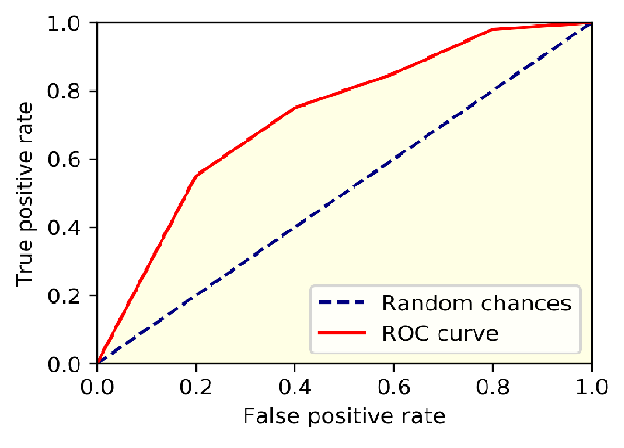


In other words, the relationships between true alarms (hit rate) and false alarms are studied. The usefulness of this graph is to allow us to visualize how our result would change if we wanted to obtain a certain number of True Positives in terms of False Negatives.

In [ ]:
# Plot ROC-AUC
def auc_plot(model, x, y, label):
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])
    auc = roc_auc_score(y,model.predict(x))
    print(label, auc)
    plt.plot(fpr, tpr, label=label)

## Preparing the data




#### Encode, Balance and Split data into Train & Test

Unfortunately, our dataset is unbalanced, i.e. the number of elements with Target at 0 is approximately four times the elements with Target at 1 and this could cause several problems for our predictive algorithms working with decision trees. To balance our data we use SMOTE. SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It takes the minority class and makes KNN among its points. It takes n points, draws a line between them, along the line creates a new point with the correct values ​​to fit on that line. As many lines are drawn and as many points are created as needed to have a balanced dataset

Random Forest Dataset

In [ ]:
string_col=df.select_dtypes("object").columns.to_list()
string_num= [x for x in df.columns if x not in string_col and x != 'HeartDisease']

# Dataset Label Encoding
df_rf = df.apply(LabelEncoder().fit_transform)

# Split X, Y
Y_rf = df_rf['HeartDisease']
X_rf = df_rf.drop(['HeartDisease'], axis=1)

# Unbalanced Dataset
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.20, random_state=0)

# Dataset scaling
scaler = MinMaxScaler()
scaler.fit(X_train_rf[string_num])
X_train_scaled_rf = X_train_rf
X_test_scaled_rf = X_test_rf
X_train_scaled_rf[string_num] = scaler.transform(X_train_rf[string_num])
X_test_scaled_rf[string_num] = scaler.transform(X_test_rf[string_num])

# Apply SMOTE
smoteOBJ = SMOTE(random_state=0)
X_train_smote_rf, y_train_smote_rf = smoteOBJ.fit_resample(X_train_scaled_rf, y_train_rf)

print("Before Smote:\n- HeartDisease 0: {}".format(sum(y_train_rf == 0)))
print("- HeartDisease 1: {}".format(sum(y_train_rf == 1)))
print("After Smote:\n- HeartDisease 0: {}".format(sum(y_train_smote_rf == 0)))
print("- HeartDisease 1: {}".format(sum(y_train_smote_rf == 1)))

Before Smote:
- HeartDisease 0: 333
- HeartDisease 1: 401
After Smote:
- HeartDisease 0: 401
- HeartDisease 1: 401


KNN dataset

In [ ]:
df_knn = df

string_col=df.select_dtypes("object").columns.to_list()
string_num= [x for x in df.columns if x not in string_col and x != 'HeartDisease']

# Dataset Label Encoding
onehotencoder = OneHotEncoder()
for col in string_col:
    tmp = onehotencoder.fit_transform(df_knn[col].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(tmp, columns = [col+str(int(i)) for i in range(tmp.shape[1])])
    df_knn = pd.concat([df_knn, dfOneHot], axis=1)
    df_knn = df_knn.drop(col, axis=1)  

# Split X, Y
Y_knn = df_knn['HeartDisease']
X_knn = df_knn.drop(['HeartDisease'], axis=1)

# Unbalanced Dataset
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, Y_knn, test_size=0.20, random_state=0)

# Dataset scaling
scaler = MinMaxScaler()
scaler.fit(X_train_knn[string_num])
X_train_scaled_knn = X_train_knn
X_test_scaled_knn = X_test_knn
X_train_scaled_knn[string_num] = scaler.transform(X_train_knn[string_num])
X_test_scaled_knn[string_num] = scaler.transform(X_test_knn[string_num])

# Apply SMOTE
smoteOBJ = SMOTE(random_state=0)
X_train_smote_knn, y_train_smote_knn = smoteOBJ.fit_resample(X_train_scaled_knn, y_train_knn)

print("Before Smote:\n- HeartDisease 0: {}".format(sum(y_train_knn == 0)))
print("- HeartDisease 1: {}".format(sum(y_train_knn == 1)))
print("After Smote:\n- HeartDisease 0: {}".format(sum(y_train_smote_knn == 0)))
print("- HeartDisease 1: {}".format(sum(y_train_smote_knn == 1)))

Before Smote:
- HeartDisease 0: 333
- HeartDisease 1: 401
After Smote:
- HeartDisease 0: 401
- HeartDisease 1: 401


## Random Forests

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.  Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.

### How does it work

Before analyzing how random forest works, we must first introduce what decision trees are.
A decision tree is a graph of decisions and their possible consequences. They are predictive models, where each internal node represents a variable, an arc towards a child node represents a possible value for that property and a leaf represents the predicted value for the target variable starting from the values ​​of the other properties, which in the tree is represented by the path from the root node to the leaf node.

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models, indeed the low correlation between models is the key. To do that we use Bootstrap to create many datasets, each one different from the other and, through Random Subset Feature Selection, we create the decision tree. This will allow us to create them on slightly different datasets and therefore we will have different trees, which however learn something from our dataset. Every single tree is not that good, but together I get quite high accuracy. Furthermore, this type of model can be created in parallel.

For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

### Execution

#### Creating the Model and train it

With Default hyperparameters. With this model most of the time the default settings approach the optimal solution

Accuracy: 0.842391304347826
Recall: 0.8785046728971962
Auc: 0.8353562325524941


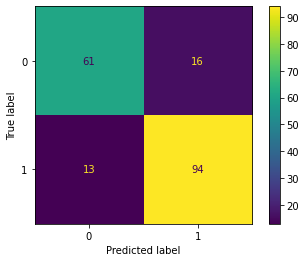

In [ ]:
# Balanced Dataset
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train_smote_rf, y_train_smote_rf)
pred = RF.predict(X_test_scaled_rf)
print("Accuracy:", accuracy_score(y_test_rf, pred))
print("Recall:", recall_score(y_test_rf, pred))
print("Auc:", roc_auc_score(y_test_rf, pred))
plot_confusion_matrix(RF, X_test_scaled_rf, y_test_rf)

ROC-AUC

RF 0.8353562325524941


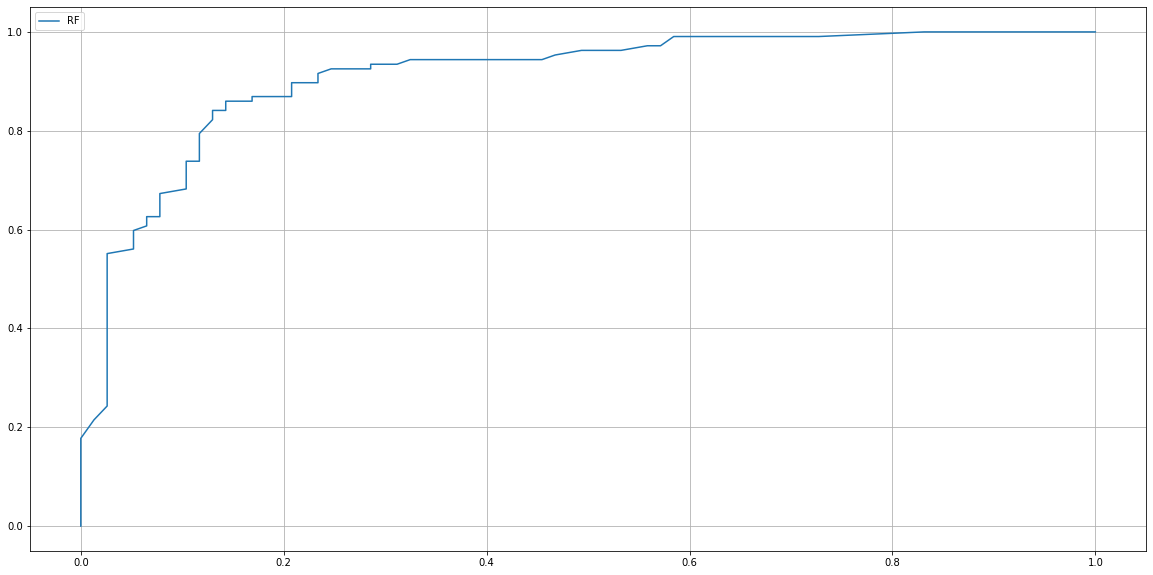

In [ ]:
plt.figure(figsize=(20,10))
plt.grid()
auc_plot(RF, X_test_scaled_rf, y_test_rf, label="RF")
plt.legend(loc="upper left")

#### Find the best parameters

In this section we want to try to use the same algorithm, but with different parameters. 

The parameters we are going to use are:
*   Max Depth: the bigger the tree, the more chances of having different trees, but I risk an overfit
*   Number of Estimators: the number of trees
*   Max Features: these are the maximum number of features Random Forest is allowed to try in individual tree. Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. However, this is not necessarily true as this decreases the diversity of individual tree which is important in random forest.
* Min_samples_leaf: The minimum number of samples required to be at a leaf node.
* Min_samples_split: The minimum number of samples required to split an internal node

With GridSearchCV we are trying all the possibility we insert into the code and it will return the best one. Then we are trying to execute the model with the parameters returned by this function.


> NB: running this cell may take a few minutes, if you don't want to print the actual GridSearchCV state change the value of "verbose" variable to 0, otherwise 2
>
> Set the value to -1 to not execute the GridSearchCV

In [ ]:
# Change the value of this variable as you wish, 0 = no prints, 2 = it will return one line per parameter set
verbose = -1 # 0 | 2
if verbose != -1:
    base_model = RandomForestClassifier()
    max_depth = [8, 9, 10, 11, 12]
    max_features = [2, 3, 4, 5, 6, 7, 8, 9, 19]
    n_estimators = [1000]
    min_samples_leaf = [1, 2, 3]
    min_samples_split = [2, 3, 4, 8]
    params = {
        'max_depth': max_depth, 
        'max_features': max_features,
        'n_estimators': n_estimators,
        'min_samples_leaf': min_samples_leaf,
        'min_samples_split': min_samples_split,
        'random_state': [0]
    }
    grid = GridSearchCV(base_model, params, verbose=verbose, scoring="accuracy")

    grid.fit(X_train_smote_rf, y_train_smote_rf)

    print("\n\nBest parameters")
    print(grid.best_params_)
else:
    print("Best previous params:\n'max_depth': 11,\n'max_features': 2,\n'n_estimators': 1000,\n'min_samples_leaf': 1,\n'min_samples_split': 3")
    grid = RandomForestClassifier(max_depth=11, max_features=2, n_estimators=1000, min_samples_leaf=1, min_samples_split=3, random_state=0)
    grid.fit(X_train_smote_rf, y_train_smote_rf)

Best previous params:
'max_depth': 11,
'max_features': 2,
'n_estimators': 1000,
'min_samples_leaf': 1,
'min_samples_split': 3


Accuracy: 0.8586956521739131
Recall: 0.8878504672897196
Auc: 0.8530161427357689


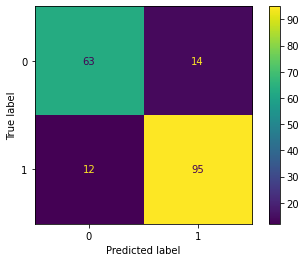

In [ ]:
pred = grid.predict(X_test_scaled_rf)
print("Accuracy:", accuracy_score(y_test_rf, pred))
print("Recall:", recall_score(y_test_rf, pred))
print("Auc:", roc_auc_score(y_test_rf, pred))
plot_confusion_matrix(grid, X_test_scaled_rf, y_test_rf)

ROC-AUC

RF TUNING 0.8530161427357689


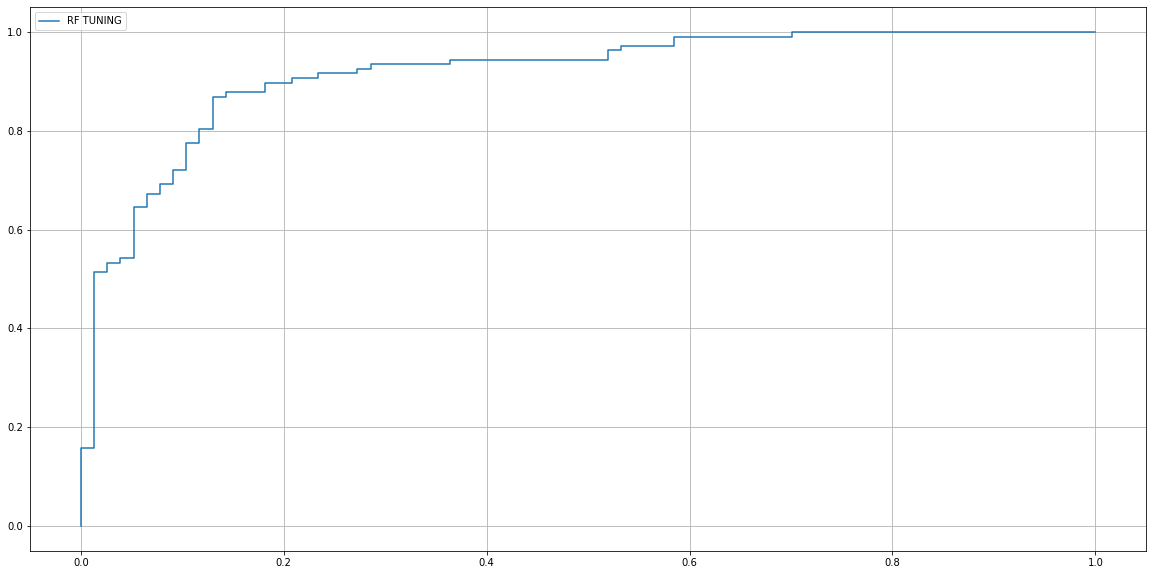

In [ ]:
plt.figure(figsize=(20,10))
plt.grid()
auc_plot(grid, X_test_scaled_rf, y_test_rf, label="RF TUNING")
plt.legend(loc="upper left")

### Conclusion
The Random Forest offers good results and excellent execution speed. Furthermore already in the version with the default parameters we obtain excellent precision. 
This result is so good also thanks to the SMOTE method to balance our dataset, as this predictive model works best on datasets that are not too unbalanced. 

Subsequently we tried to do the tuning of the parameters although this model doesn’t require a particular tuning as the improvements that can be obtained are minor, as in our case.




So you should be wondering if it is worth running a GridSearchCV, which takes several minutes/hours to run, rather than using the model with the basic parameters.



---



## KNN

The k-nearest neighbors is an algorithm used in pattern recognition for the classification of objects based on the characteristics of the objects close to the one considered.
KNN algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

### How does it work

First of all we have to introduce some fondumental aspects: What is a "supervised machine learning algorithm"? A supervised machine learning algorithm is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.
Supervised machine learning algorithm that can be used to solve both classification and regression problems. It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).
Have to find the right K, in order to select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.
As we decrease the value of K to 1, our predictions become less stable (warning to overfitting). Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions, but if we begin to see an increasing number of errors (warning to underfitting). It is at this point that we know we have pushed the K value too far.
In cases a majority vote is used between the labels, usually K an odd number is chosen to have a tiebreaker.
Main advantagies are: 
The algorithm is simple and easy to implement.
There’s no need to build a model, tune several parameters, or make additional assumptions.
The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).
But:
the algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

### Execution

#### Creating the Model and train it

With Default hyperparameters

Accuracy: 0.7934782608695652
Recall: 0.8504672897196262
Auc: 0.7823765020026703


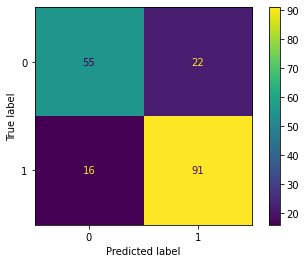

In [ ]:
# Balanced Dataset
knn = KNeighborsClassifier()
knn.fit(X_train_smote_knn, y_train_smote_knn)
pred = knn.predict(X_test_scaled_knn)
print("Accuracy:", accuracy_score(y_test_knn, pred))
print("Recall:", recall_score(y_test_knn, pred))
print("Auc:", roc_auc_score(y_test_knn, pred))
plot_confusion_matrix(knn, X_test_scaled_knn, y_test_knn)

ROC-AUC

KNN 0.7823765020026703


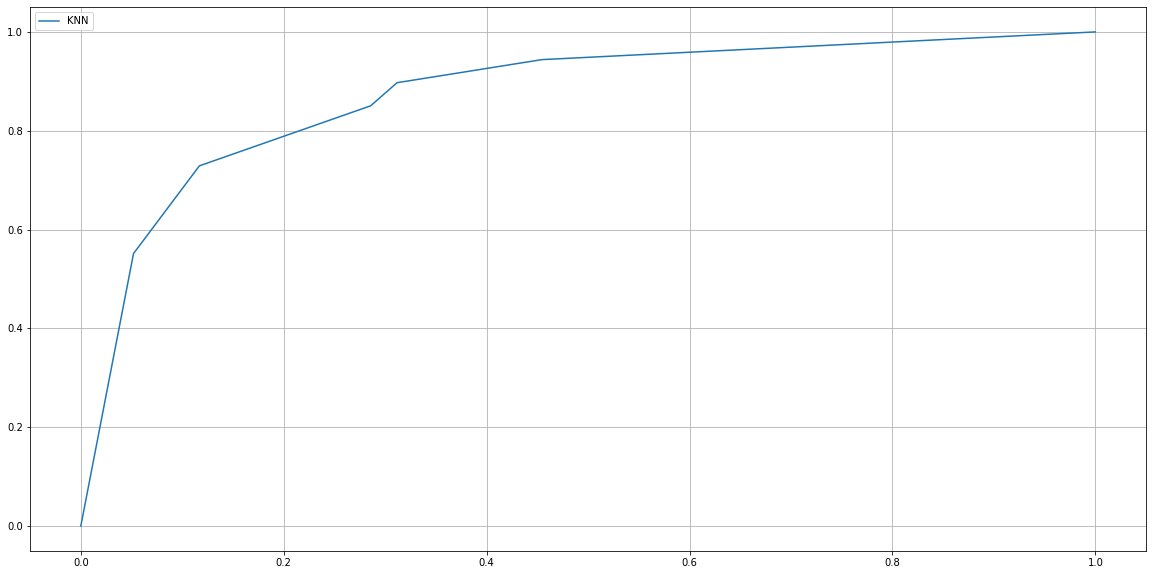

In [ ]:
plt.figure(figsize=(20,10))
plt.grid()
auc_plot(knn, X_test_scaled_knn, y_test_knn, label="KNN")
plt.legend(loc="upper left")

#### Find the best parameters

In this section we want to try to use the same algorithm, but with different parameters. 

The parameters we are going to use are:
*   N_neighbors: number of neighbors
*   Weights: with uniform all points in each neighborhood are weighted equally, with distance weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

With GridSearchCV we are trying all the possibility we insert into the code and it will return the best one. Then we are trying to execute the model with the parameters returned by this function.


> NB: running this cell may take a few minutes, if you don't want to print the actual GridSearchCV state change the value of "verbose" variable to 0, otherwise 2
>
> Set the value to -1 to not execute the GridSearchCV

In [ ]:
# Change the value of this variable as you wish, 0 = no prints, 2 = it will return one line per parameter set
verbose = -1 # 0 | 2
if verbose != -1:
	base_model = KNeighborsClassifier()
	n_neighbors = [1,3,5,7,9,11]
	metric = ["euclidean", "manhattan", "chebyshev", "minkowski"] 
	params = {
		"n_neighbors": n_neighbors,
		"metric": metric,
	}

	grid2 = GridSearchCV(base_model, params, verbose=verbose, scoring="accuracy")
	grid2.fit(X_train_smote_knn, y_train_smote_knn)

	print("\n\nBest parameters")
	print(grid2.best_params_)
else:
	print("Best previous params:\n'n_neighbors': 9,\n'metric': 'manhattan'")
	grid2 = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
	grid2.fit(X_train_smote_knn, y_train_smote_knn)

Best previous params:
'n_neighbors': 9,
'metric': 'manhattan'


Accuracy: 0.8260869565217391
Recall: 0.8411214953271028
Auc: 0.823158150260954


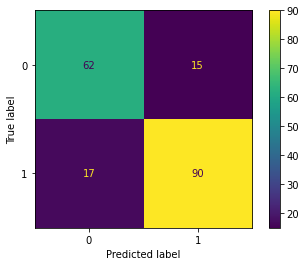

In [ ]:
pred = grid2.predict(X_test_scaled_knn)
print("Accuracy:", accuracy_score(y_test_knn, pred))
print("Recall:", recall_score(y_test_knn, pred))
print("Auc:", roc_auc_score(y_test_knn, pred))
plot_confusion_matrix(grid2, X_test_scaled_knn, y_test_knn)

ROC-AUC

KNN TUNING 0.823158150260954


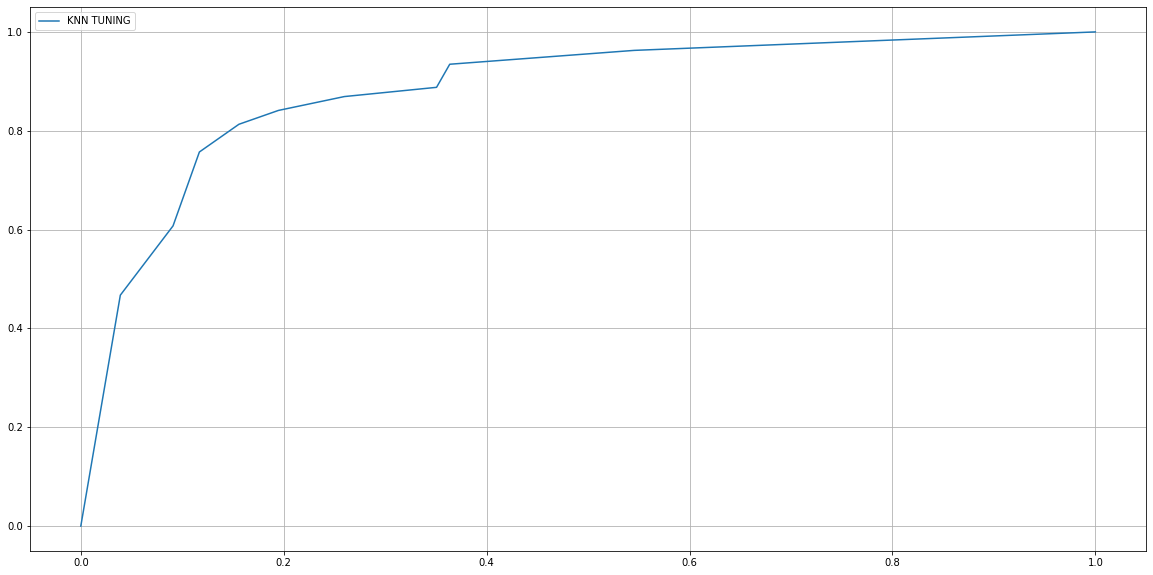

In [ ]:
plt.figure(figsize=(20,10))
plt.grid()
auc_plot(grid2, X_test_scaled_knn, y_test_knn, label="KNN TUNING")
plt.legend(loc="upper left")

### Conclusion

We must note that its default accuracy is less than the Random Forest, this is caused by the number of neighbors which must be chosen carefully and which can be considered its most important parameter.

In fact, in the section dedicated to the tuning of the parameters we can see how the precision increases as the number of neighbors increases.

The only disadvantage of this algorithm is that it becomes slow if the number of examples / predictions / independent variables increases. 

KNN is a lazy learner, there is no function and therefore the model is as large as the data.




---



# **Conclusion**

Recap all ROC-AUC

RF 0.8353562325524941
RF TUNING 0.8530161427357689
KNN 0.7823765020026703
KNN TUNING 0.823158150260954


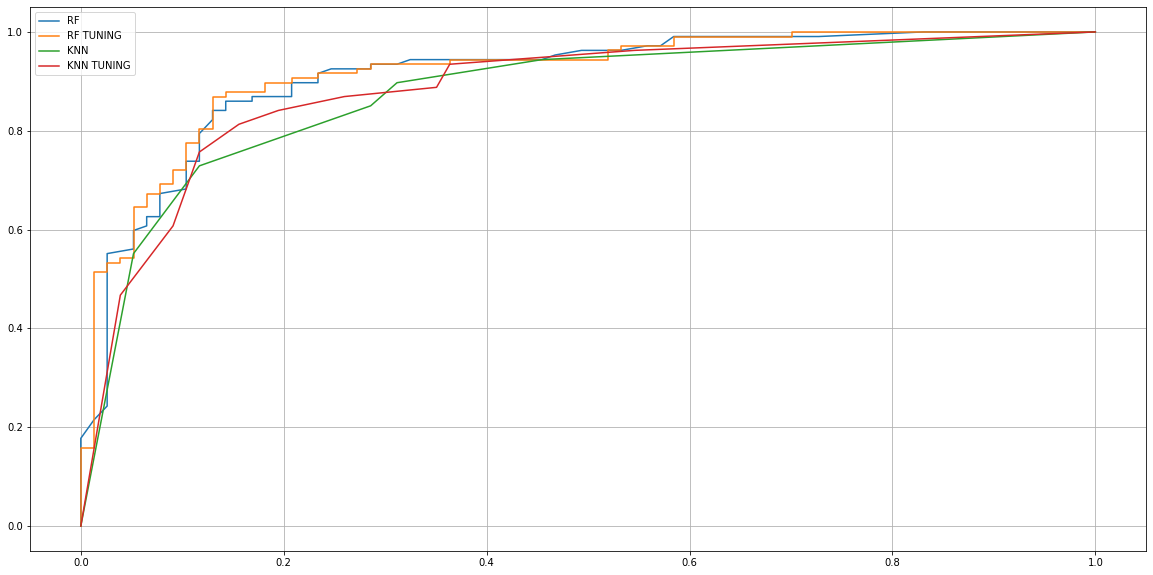

In [ ]:
plt.figure(figsize=(20,10))
plt.grid()
auc_plot(RF, X_test_scaled_rf, y_test_rf, label="RF")
auc_plot(grid, X_test_scaled_rf, y_test_rf, label="RF TUNING")
auc_plot(knn, X_test_scaled_knn, y_test_knn, label="KNN")
auc_plot(grid2, X_test_scaled_knn, y_test_knn, label="KNN TUNING")
plt.legend(loc="upper left")

In this project we prefer the Random Forest (also without tuning the parameters), remembering however that we must first execute the SMOTE function (which uses KNN) to balance the dataset, because it has a better accuracy, recall and AUC. 

These data, together, give us a good overview of the goodness of this model

How to improve: by adding more data (medical or about individual’s life) or adding another ML model, like XGBoost

Applications: in any medical area where you want to prevent an heart disease/attack

